Подключите все необходимые библиотеки numpy,matplotlib,pandas

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

f = pd.read_csv('temperature.csv', sep=';')
f.head()
print(f)
x = f.loc[:, "Temp"]
y = f.loc[:, "S"]


     Temp       S
0       4   395.1
1       4   356.4
2       5   564.6
3       6   559.5
4       6   510.6
..    ...     ...
354    35  2429.4
355    36  2400.6
356    36  2484.9
357    36  2428.5
358    36  2475.0

[359 rows x 2 columns]


Открыть файл CSV. При этом обратить внимание на разделители. Вывести несколько строк

In [19]:
cm = np.corrcoef(x, y)
print(cm)

[[1.         0.98753904]
 [0.98753904 1.        ]]


Построить корреляционную матрицу. Вычислить коэффициент корреляции между температурой и выручкой

Построить диаграмму с помощью функции scatter

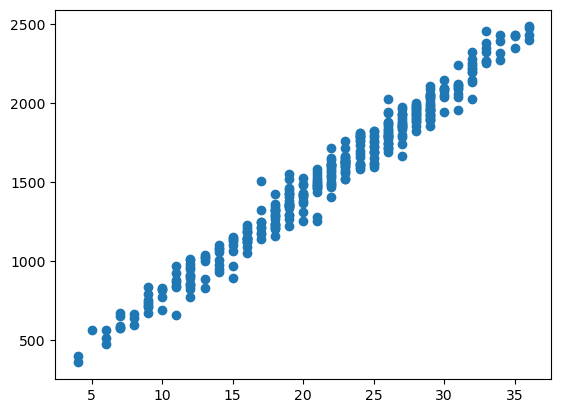

In [20]:
plt.scatter(x, y)

На основе графического представления сделать вывод о зависимости

Temp(S)=a*S+b

Вычислить коэффициенты a,b методом наименьших квадратов

In [43]:
a=(len(x)*np.sum(x*y)-np.sum(x)*np.sum(y))/(len(x)*np.sum(x**2)-np.sum(x)**2)
b=(np.sum(y)-a*np.sum(a))/len(x)
print(a,b)

64.21966028721351 1534.9134686144703


In [38]:
a1,  b1 =np.polyfit(x, y, 1)
print(a1, b1)

64.21966028721346 136.96767854329994


Вычислить коэффициенты a(slope),b(intercept), используя функцию polyfit

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# создаем модель линейной регрессии
linear_regression_model = LinearRegression()
# метод train_test_split используем для разделения данных на две части: одну для обучения, другую для тестирования
x_train, x_test, y_train, y_test = train_test_split(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1), test_size=0.2, random_state=40)
# обучение модели
linear_regression_model.fit(x_train, y_train)
# Прогноз
predicted_data = linear_regression_model.predict(x_test)
# определеим  коэффициенты a(sk_slope),b(sk_intercept)
sk_slope = linear_regression_model.coef_[0]
sk_intercept = linear_regression_model.intercept_
print(sk_slope, sk_intercept)

[64.24691873] [135.22727081]


Вычислить коэффициенты a(sk_slope),b(sk_intercept), используя библиотеку scikit-learning

In [42]:
from sklearn.metrics import r2_score
sk_data= sk_slope*np.array(x) + sk_intercept
mnk_data = a*np.array(x)+b
np_data=a1*np.array(x)+b1

r_mnk = r2_score(y, mnk_data)
r_np = r2_score(y, np_data)
r_sk = r2_score(y, sk_data)
print(r_mnk,r_np,r_sk)

-8.062712497181968 0.975233364434066 0.9752271555494378


Построить диаграмму и аппроксимирующую линию

Оценить результаты (вычислить коэффициент детерминации)